In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors_cm
from matplotlib import cm
import datetime
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature
# import xarray as xr
# from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import mpl_toolkits.axes_grid1.inset_locator as il
import matplotlib.patches as mpatches
# import gpxpy

In [3]:
plt.rcParams['figure.facecolor'] = 'w'

In [2]:
# GEBCO_path = '/home/matweyn/Desktop/Useful/gebco_2021_sub_ice_topo/GEBCO_2021_sub_ice_topo.nc'
# delta_lat, delta_lon = np.linspace(64, 85, num=420), np.linspace(25, 105, num=200)
# GEBCO = xr.open_dataset(GEBCO_path)
# bottom_xr = GEBCO.elevation.sel(lat = delta_lat, lon = delta_lon, method='nearest')
# bottom_np = np.where(bottom_xr.values < 0, bottom_xr.values, None) # Замена топографии суши на None
# extent = [25, 105, 64, 85] # [лево, право, низ, верх]
# levels = [0, -10, -30, -50, -75, -100, -150, -250, -400, -600, -800, -1000, -1500, -3000, -5000]

tds = pd.Timedelta(days=365*51+31*7+18, hours=-7, minutes=-32) # поправка на кривое время большого планшета
files = os.listdir('./FML_Kara_2021/')
names = ['filename', 'observer', 'institution', 'mode', 'cruise', 'ship_speed', 'region', 'weather', 'height', 'width', 'N', 'n',
         'datetime', 'lat', 'lon', 'type', 'size', 'M', 'm']
# data_crs = ccrs.PlateCarree()


In [6]:
plt.style.use('default')

In [7]:
# gpx_file = open('/home/matweyn/Desktop/Rabota/AI-58/AI58-3sep.gpx', 'r')  

# lons, lats, times = [], [], []
# gpx = gpxpy.parse(gpx_file)
# for track in gpx.tracks: 
#     for segment in track.segments: 
#         for point in segment.points: 
#             lats.append(point.latitude)
#             lons.append(point.longitude)
#             times.append(point.time.replace(tzinfo=None))
            
# track = pd.DataFrame({'lat': lats,
#                       'lon': lons,
#                       'datetime': times})
track = pd.read_csv('gps3sep.csv', parse_dates=['datetime'])

FileNotFoundError: [Errno 2] No such file or directory: '../gps3sep.csv'

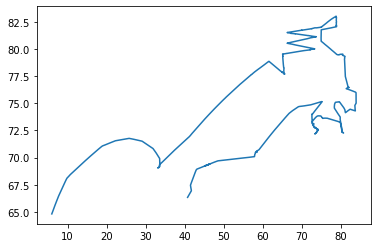

In [26]:
plt.plot(track.lon, track.lat)

In [9]:
# Разделение групп треков по времени

regions = {'White sea': ['2021-08-10 00:00:00', '2021-08-10 23:00:00'],
           'Pechora sea': ['2021-08-11', '2021-08-12 8:00:00'],
           'Kara gate': ['2021-08-12 7:00:00', '2021-08-13 00:00:00'],
           'Kara west': ['2021-08-13 07:00:00', '2021-08-15 00:00:00'],
           'Rivers': ['2021-08-15 13:00:00', '2021-08-19 15:00:00'],
           'Kara middle': ['2021-08-19 16:00:00', '2021-08-20 23:00:00'],
           'Kara north': ['2021-08-21 00:00:00', '2021-08-26 20:00:00'],
           'Barents sea': ['2021-08-26 20:00:00','2021-08-30 23:00:00'],
           'Murmansk': ['2021-08-31 00:00:00','2021-09-01 23:00:00']}

# Кооординаты вставки диаграмм

anchors = {'White sea': (26, 63.5),
           'Pechora sea': (41, 69.5),
           'Kara gate': (53, 65),
           'Kara west': (55, 73),
           'Rivers': (84, 72),
           'Kara middle': (83, 76),
           'Kara north': (81, 82),
           'Barents sea': (42, 75.2),
           'Murmansk': (25, 70)}

# Разделение замеченных объектов

origin = {'nature':['Feather', 'Jellyfish', 'Leaves', 'Other wood'], 
          'human_nonplastic':['Balls', 'Beams / Dunnage', 'Carpet & Furnishing', 'Clothing', 'Litter patch >20 items', 'Newspapers & magazines',
                              'Other metal', 'Other paper', 'Other textiles', 'Rope / string and nets', 'Wood boards', 'Cans'],
          'human_plastic': ['Bag', 'Cover / packaging', 'Fishing net', 'Litter patch >20 items', 'Other plastic/polystyrene items', 'Plastic bottle',
                            'Plastic container', 'Plastic pieces 2.5cm - 50cm', 'Plastic pieces > 50cm', 'Polystyrene pieces 2.5 cm - 50cm',
                            'Polystyrene pieces > 50 cm', 'Polyurethane granules <5mm', 'Sheets', 'Synthetic rope', 'Foam'],
          'other':['Other']}

plast_types = {'Other plastic items': ('Fishing net', 'Plastic bottle', 'Plastic container', 'Cover / packaging', 'Polyurethane granules <5mm', 'Foam'),
               'Bag': ('Bag',),
               'Synthetic rope': ('Synthetic rope',),
               'Sheets': ('Sheets',),
               'Plastic pieces': ('Plastic pieces 2.5cm - 50cm', 'Plastic pieces > 50cm'), 
               'Polystyrene pieces': ('Polystyrene pieces 2.5 cm - 50cm', 'Polystyrene pieces > 50 cm', 'Other plastic/polystyrene items'), 
               'Litter patch >20 items': ('Litter patch >20 items', )}

# Палитры для треков, пластика и непластика
YlOrRd = cm.get_cmap('YlOrRd_r')
cols = YlOrRd(np.linspace(0, 0.9, 9))

palette_nonplastic = dict(zip(origin['human_nonplastic'], ['firebrick', 'blueviolet', 'orchid', 'olivedrab', 'dimgray', 'lightsalmon', 'darkcyan',
                                                           'crimson', 'seagreen', 'gold', 'silver']))
palette_plastic = dict(zip(plast_types, ['firebrick', 'blueviolet', 'orchid', 'olivedrab', 'dimgray', 'lightsalmon', 'darkcyan']))
# 'crimson', 'seagreen', 'gold', 'silver', 'indigo', 'sienna', 'deeppink']))

In [10]:
fullfile = []
for file in files:
    data = pd.read_csv('./FML_Kara_2021/'+file, sep=';', names=names, parse_dates=['datetime'])
    data = data.drop(labels=[0,1])
    fullfile.append(data)
fullfile = pd.concat(fullfile)

fullfile['datetime'][fullfile['datetime'] < '2020-01-01 00:00:00'] = fullfile['datetime'] + tds
fullfile = fullfile.sort_values(by='datetime', ignore_index=True)
dt_in = fullfile.groupby('filename', sort=False)['datetime'].max() - fullfile.groupby('filename', sort=False)['datetime'].min()
shorty = dt_in[dt_in < '00:15:00']
first = fullfile.groupby('filename', sort=False)['datetime'].first()
last = fullfile.groupby('filename', sort=False)['datetime'].last()
dt_bwd = abs(last.iloc[:-1].reset_index(drop=True) - first.iloc[1:].reset_index(drop=True))
dt_fwd = dt_bwd.iloc[1:].reset_index(drop=True)
dates = pd.DataFrame({'fname': fullfile['filename'].unique()[1:],
                      'start': first.values[1:], 'end': last.values[1:], 
                      'dt_bwd': dt_bwd, 'dt_fwd': dt_fwd})
shorty_up = dates.set_index('fname').loc[shorty.index][dates.set_index('fname').dt_bwd < dates.set_index('fname').dt_fwd].reset_index()
shorty_down = dates.set_index('fname').loc[shorty.index][dates.set_index('fname').dt_bwd > dates.set_index('fname').dt_fwd].reset_index()
inx_down = np.array([dates.loc[dates.fname == fn].index[0] for fn in shorty_down.filename])
inx_up = np.array([dates.loc[dates.fname == fn].index[0] for fn in shorty_up.filename])
dict_down = dict(zip(shorty_down.filename, dates.fname.iloc[inx_down+1]))
dict_up = dict(zip(shorty_up.filename, dates.fname.iloc[inx_up-1]))
fullfile['filename'] = fullfile['filename'].replace(dict_down)
fullfile['filename'] = fullfile['filename'].replace(dict_up)
filenames = fullfile['filename'].unique()
markers = dict(zip(filenames, range(len(filenames))))
fullfile['markers'] = fullfile['filename'].apply(lambda x: markers[x])
# fullfile = fullfile.sort_values(by='datetime')
fullfile.lat= fullfile.lat.astype(float)
fullfile.lon= fullfile.lon.astype(float)
fullfile = fullfile.set_index('datetime')
fullfile['type'][fullfile['type'].isin(plast_types['Polystyrene pieces'])] = np.nan
fullfile['type'][fullfile['type'].isin(['List1'])] = np.nan
fullfile['category'] = fullfile['type']
for k, v in plast_types.items():
    inx = fullfile['category'].isin(v)
    fullfile['category'][inx] = k

# fullfile.to_csv('FML_all.csv')

<ipython-input-10-b17e806e0ad3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fullfile['datetime'][fullfile['datetime'] < '2020-01-01 00:00:00'] = fullfile['datetime'] + tds
<ipython-input-10-b17e806e0ad3>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  shorty_up = dates.set_index('fname').loc[shorty.index][dates.set_index('fname').dt_bwd < dates.set_index('fname').dt_fwd].reset_index()
<ipython-input-10-b17e806e0ad3>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  shorty_down = dates.set_index('fname').loc[shorty.index][dates.set_index('fname').dt_bwd > dates.set_index('fname').dt_fwd].reset_index()
<ipython-input-10-b17e806e0ad3>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

In [11]:
all_types = ['Balls', 'Beams / Dunnage', 'Carpet & Furnishing', 'Clothing',
             'Litter patch >20 items', 'Newspapers & magazines', 'Other metal',
             'Other paper', 'Other textiles', 'Rope / string and nets', 'Wood boards', 'Cans',
             'Other plastic items', 'Synthetic rope', 'Bag', 'Plastic pieces', 'Foam']
group_types = ['Boards', 'Textiles', 'Paper', 'Other non-plastic litter',
               'Litter patch >20 items',
               'Other plastic items', 'Synthetic rope', 'Bag', 'Plastic pieces']

In [12]:
human = fullfile[fullfile['category'].isin(all_types)]

In [13]:
human['category'][human['category'].isin(['Beams / Dunnage', 'Carpet & Furnishing', 'Wood boards',])] = 'Boards'
human['category'][human['category'].isin(['Clothing', 'Other textiles', 'Wood boards',])] = 'Textiles'
human['category'][human['category'].isin(['Newspapers & magazines', 'Other paper'])] = 'Paper'
human['category'][human['category'].isin(['Balls', 'Rope / string and nets',
                                          'Other metal', 'Cans'])] = 'Other non-plastic litter'
human['category'][human['category'] == 'Foam'] = 'Other plastic items'

<ipython-input-13-e690e90458a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human['category'][human['category'].isin(['Beams / Dunnage', 'Carpet & Furnishing', 'Wood boards',])] = 'Boards'
C:\Users\MatweyN\anaconda3\lib\site-packages\pandas\core\series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
<ipython-input-13-e690e90458a8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human['

In [226]:
countfile = human.groupby('category').count().markers[reversed(group_types)]
countfile

category
Plastic pieces              177
Bag                          20
Synthetic rope               24
Other plastic items          42
Litter patch >20 items       25
Other non-plastic litter      4
Paper                         6
Textiles                      2
Boards                        8
Name: markers, dtype: int64

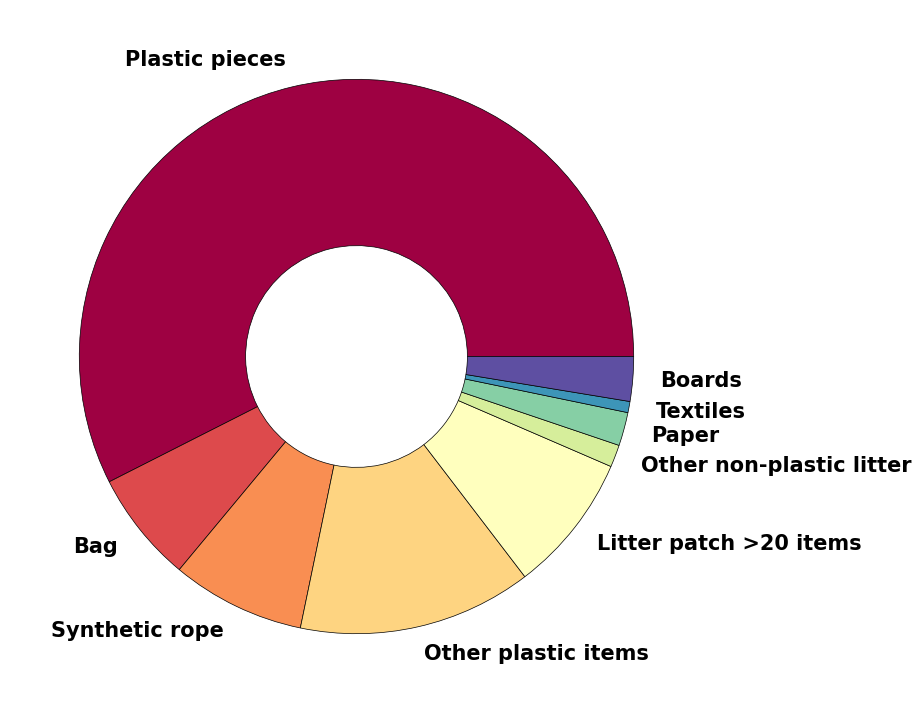

In [27]:
cmap = cm.get_cmap('Spectral')(np.linspace(0, 1, len(group_types)))
countfile = human.groupby('category').count().markers[reversed(group_types)]
fig, ax = plt.subplots(1,1, figsize=(12,9))
ax.pie(countfile.values, labels=countfile.keys(), textprops={'fontsize':15, 'fontweight':'bold'},
       wedgeprops={'width':0.6, 'edgecolor':'k', 'linewidth':0.5, 'alpha':1}, colors=cmap)
# plt.show()
plt.savefig('Total_pie.png', dpi=300, bbox_inches='tight')

Index(['Bag', 'Balls', 'Beams / Dunnage', 'Cans', 'Carpet & Furnishing',
       'Clothing', 'Cover / packaging', 'Feather', 'Fishing net', 'Foam',
       'Jellyfish', 'Leaves', 'Litter patch >20 items',
       'Newspapers & magazines', 'Other', 'Other metal', 'Other paper',
       'Other textiles', 'Other wood', 'Paper packaging', 'Plastic bottle',
       'Plastic container', 'Plastic pieces 2.5cm - 50cm',
       'Plastic pieces > 50cm', 'Polyurethane granules <5mm',
       'Rope / string and nets', 'Sheets', 'Synthetic rope', 'Wood boards'],
      dtype='object', name='type')

In [19]:
def rating(fullfile, start, stop):
    """
        Функция rating() позволяет оценить время наблюдения за морской поверхностью
    отдельными наблюдателями. Выходными данными является словарь с наименованием наблюдателя
    и соответствующим временем.
    
        fullfile - Данные из FML, сведённые в один DataFrame и ранжированные по времени, которое,
    является индексом.
        start - Дата начала периода оценки в формате 'ГГГГ-ММ-ДД'.
        stop - Дата конца периода оценки в формате 'ГГГГ-ММ-ДД'.
        
        Важно, что наименование одного и того же наблюдателя может различаться в зависимости
    от того, как он себя записал в приложении.
    """
    
    rating_fullfile = fullfile[start + ' 00:00:00':stop + ' 00:00:00']
    rating_fullfile['markers'].unique()
    arr_tds = np.full(len(rating_fullfile['observer'].unique()), pd.Timedelta(0))
    rating_dict = dict(zip(rating_fullfile['observer'].unique(), arr_tds))

    for marker in rating_fullfile['markers'].unique():
        rating_time = rating_fullfile[rating_fullfile['markers'] == marker].index.max() -\
            rating_fullfile[rating_fullfile['markers'] == marker].index.min()
        rating_dict[rating_fullfile[rating_fullfile['markers'] == marker]['observer'].unique()[0]] =\
        rating_dict[rating_fullfile[rating_fullfile['markers'] == marker]['observer'].unique()[0]]+rating_time
        
    return rating_dict

rating(fullfile, '2021-08-19', '2021-08-20')

{'NowikovM': Timedelta('0 days 04:05:42'),
 'Polina Lepikhina': Timedelta('0 days 00:42:28'),
 'alisa medvedeva': Timedelta('0 days 00:59:43')}

In [17]:
rating(fullfile, '2021-08-26', '2021-09-01')

{'Maria Pogojeva': Timedelta('0 days 09:14:19'),
 'Polina Lepikhina': Timedelta('0 days 08:05:51'),
 'NowikovM': Timedelta('0 days 01:54:31'),
 'Pogojeva Maria': Timedelta('0 days 00:35:14'),
 'evenkova tatiana': Timedelta('0 days 00:54:22'),
 'Nelly Gettih': Timedelta('0 days 00:56:28'),
 'likhacheva Galina ': Timedelta('0 days 00:59:06'),
 'Galina Likhacheva': Timedelta('0 days 03:05:43'),
 'gettih nelly': Timedelta('0 days 01:13:16'),
 'Daria Osipova': Timedelta('0 days 00:48:24'),
 'evenkova': Timedelta('0 days 01:52:10'),
 'Nurlibaeva': Timedelta('0 days 00:46:18'),
 'Anastasia Artamonova': Timedelta('0 days 01:02:04'),
 ' Elizabeth Lipukhin': Timedelta('0 days 00:33:28'),
 'Elizabeth Lipukhin': Timedelta('0 days 01:46:28'),
 'Anfisa Berezina': Timedelta('0 days 01:06:52'),
 'POLINA LEPIKHINA': Timedelta('0 days 00:57:25')}

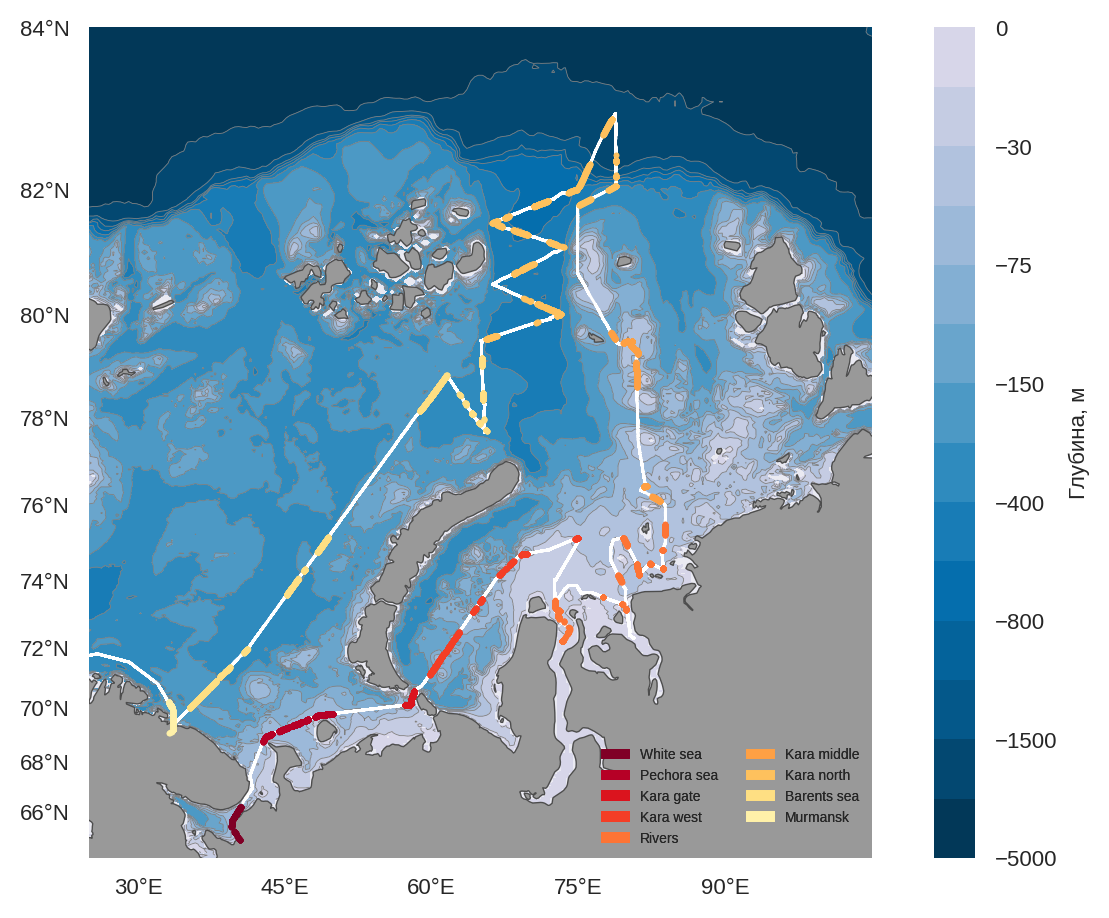

In [15]:
# Построение карты с бубликами распределения

fig = plt.figure(dpi=200)
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent(extent, crs=data_crs)
dno = ax.contourf(delta_lon, delta_lat, bottom_np, levels = list(reversed(levels)), cmap='PuBu_r', vmin=-3000,
                  norm=colors_cm.BoundaryNorm(boundaries=list(reversed(levels)), ncolors=200), transform=data_crs, zorder=0)
ax.contour(delta_lon, delta_lat, bottom_np, levels = list(reversed(levels)), vmin=-3000, linewidths=0.3, colors='grey', linestyles='-',
           norm=colors_cm.BoundaryNorm(boundaries=list(reversed(levels)), ncolors=200), transform=data_crs, zorder=1)
ax.add_feature(cfeature.LAND, edgecolor='0.3', linewidth = 0.5, zorder=2, facecolor='0.6')

ax.plot(track.lon, track.lat, c='w', lw=1, transform=data_crs)

for col, region in zip(cols, regions):
    ax.scatter(fullfile[regions[region][0]:regions[region][1]].lon, fullfile[regions[region][0]:regions[region][1]].lat,
               transform=data_crs, s=3, color=col, label=region, zorder=3)
ax.set_xticks(np.arange(30, 105, 15), crs=data_crs)
ax.set_yticks(np.arange(66, 85, 2), crs=data_crs)
lon_formatter = LongitudeFormatter(number_format='.0f', dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.0f')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.tick_params(labelsize=8)
# for region in anchors:
#     ax1 = fig.add_axes([0,0,1,1], label=region)
#     x0, y0 = ccrs.Mercator().transform_point(anchors[region][0], anchors[region][1], ccrs.PlateCarree())
#     x0_new, y0_new = ax.transLimits.transform((x0, y0))
#     ip = il.InsetPosition(ax, [x0_new, y0_new, 0.15, 0.15])
#     ax1.set_axes_locator(ip)
#     countfile = fullfile[regions[region][0]:regions[region][1]].groupby('type').count().markers
#     human_lit_count = []
#     human_lit_name = []
#     for litter in plast_types:
#         pl_i = 0
#         for item in plast_types[litter]:
#             if item in countfile:
#                 pl_i += countfile[item]
#         human_lit_count.append(pl_i)
#         human_lit_name.append(litter)
#     for litter in origin['human_nonplastic']:
#         if litter in countfile:
#             human_lit_count.append(countfile[litter])
#             human_lit_name.append(litter)
#     plt.pie(human_lit_count, wedgeprops={'width':0.6, 'edgecolor':'k', 'linewidth':0.5, 'alpha':1},
#             colors = [palette_plastic[key] for key in human_lit_name])
first_legend = fig.legend(handles=[mpatches.Patch(color=cols[i], label=region) for i, region in zip(range(9), regions)],
                          bbox_to_anchor=(0.745, 0.125), loc='lower right', ncol=2, prop={'size': 5})
plt.gca().add_artist(first_legend)
# ax.legend(handles=[mpatches.Patch(color=palette_plastic[litter] , label=litter) for litter in plast_types],
#           loc='upper left', prop={'size': 5})
cbar = plt.colorbar(dno)
cbar.ax.tick_params(labelsize=8)
cbar.set_label('Глубина, м', fontsize=8)
#plt.savefig('Transect_scheme.png', dpi=300, bbox_inches='tight')

In [15]:
# Расчёт концентраций категорий FML в треках и запсиь в файл

# Расчёт площади трека
w = 0.008 # ширина трека (км)
lon_m, lat_m, dtime, length, square, filename  = [], [], [], [], [], []
lat_start, lon_start, lat_stop, lon_stop, datetime_start, datetime_stop = [], [], [], [], [], []
nechto = np.zeros((len(fullfile.markers.unique()), 5))
for (marker, i) in zip(fullfile.markers.unique(), range(len(fullfile.markers.unique()))):
    dlat = fullfile.loc[fullfile.markers == marker].lat.max() - fullfile.loc[fullfile.markers == marker].lat.min()
    dlon = fullfile.loc[fullfile.markers == marker].lon.max() - fullfile.loc[fullfile.markers == marker].lon.min()
    cos_fi = np.cos(np.radians(fullfile.loc[fullfile.markers == marker].lat.mean( )))
    
    length.append(np.sqrt(((dlat*111)**2 + (dlon*cos_fi*111)**2)))
    square.append(w * length[i])
    datetime_start.append(fullfile.loc[fullfile.markers == marker].index.min())
    datetime_stop.append(fullfile.loc[fullfile.markers == marker].index.max())
    dtime.append(fullfile.loc[fullfile.markers == marker].index.max() - fullfile.loc[fullfile.markers == marker].index.min())
    lon_m.append(fullfile.loc[fullfile.markers == marker].lon.mean())
    lat_m.append(fullfile.loc[fullfile.markers == marker].lat.mean())
    lat_start.append(fullfile.loc[fullfile.markers == marker].lat.first('1s'))
    lon_start.append(fullfile.loc[fullfile.markers == marker].lon.first('1s'))
    lat_stop.append(fullfile.loc[fullfile.markers == marker].lon.last('1s'))
    lon_stop.append(fullfile.loc[fullfile.markers == marker].lon.last('1s'))
    filename.append(fullfile.loc[fullfile.markers == marker].filename.unique())
    litter_total = fullfile.loc[fullfile.markers == marker].groupby('type').count().markers.sum()
    countfile = fullfile.loc[fullfile.markers == marker].groupby('type').count().markers
    
    # Расчёт количества природных (n) элементов
    counter_n = 0
    for litter in origin['nature']:
        if litter in countfile:
            counter_n += countfile[litter]

    # Расчёт количества антропогенных элементов
    if 'Other' in countfile:
        counter_h = litter_total - counter_n - countfile['Other']
    else:
        counter_h = litter_total - counter_n
        
    # Расчёт количества пластиковых (hp) и непластиковых (hn) элементов
    counter_hp = 0
    for litter in origin['human_plastic']:
        if litter in countfile:
            counter_hp += countfile[litter]
    counter_hn = counter_h - counter_hp
    
    # Запись концентраций [всего, природного, антроп-го, а-го непл-го, а-го пл-го] в массив nechto
    nechto[i] = [litter_total/square[i], counter_n/square[i], counter_h/square[i], counter_hn/square[i], counter_hp/square[i]]

conc_df = pd.DataFrame(nechto, columns=['total', 'nature', 'human', 'h_nonplastic', 'h_plastic'])
conc_df['lon_mean'] = lon_m
conc_df['lat_mean'] = lat_m
conc_df['datetime_start'] = datetime_start
conc_df['datetime_stop'] = datetime_stop
conc_df['dtime'] = dtime
conc_df['length'] = length
conc_df['width'] = 0.008
conc_df['square'] = square
conc_df['integral_speed'] = conc_df.length*1000/conc_df.dtime.apply(lambda x: x.seconds)
conc_df['filename'] = filename
start = fullfile.groupby('markers').first()
end = fullfile.groupby('markers').last()
track_ll = pd.merge(start[['lon', 'lat']], end[['lon', 'lat']], left_on='markers', right_on='markers', suffixes=['_start', '_end'])
conc_df = pd.concat([conc_df, track_ll], axis=1)
p_count = fullfile[fullfile['type'].isin(origin['human_plastic'])].groupby('markers').count().N
np_count = fullfile[fullfile['type'].isin(origin['human_nonplastic'])].groupby('markers').count().m
conc_df = pd.merge(conc_df, p_count, how='left', left_index=True, right_index=True)
conc_df = pd.merge(conc_df, np_count, how='left', left_index=True, right_index=True)
conc_df = conc_df.rename(columns={'N':'plastic', 'm':'nonplastic'})
conc_df[['plastic','nonplastic']] = conc_df[['plastic','nonplastic']].fillna(0)
#conc_df.to_excel('FML_tracks_Kara_2021.xlsx')

In [4]:
conc_df =pd.read_excel('FML_tracks_Kara_2021.xlsx')
conc_df

,Unnamed: 0,total,nature,human,h_nonplastic,h_plastic,lon_mean,lat_mean,datetime_start,datetime_stop,...,width,square,integral_speed,filename,lon_start,lat_start,lon_end,lat_end,plastic,nonplastic
0,0,74.294275,74.294275,0.000000,0.000000,0.000000,40.349859,64.808780,2021-08-10 13:53:40,2021-08-10 14:31:14,...,0.008,0.107680,5.971600,['Maria Pogojeva_SOI_2021_08_10_13_53'],40.440308,64.773964,40.242775,64.861343,0,0
1,1,0.000000,0.000000,0.000000,0.000000,0.000000,40.171817,64.905376,2021-08-10 14:39:20,2021-08-10 15:05:05,...,0.008,0.066641,5.391678,['Maria Pogojeva_SOI_2021_08_10_14_39'],40.206360,64.887718,40.093849,64.945641,0,0
2,2,74.015018,46.259387,0.000000,0.000000,0.000000,39.903797,65.101983,2021-08-10 15:39:41,2021-08-10 16:11:03,...,0.008,0.108086,7.178943,['evenkova tatiana_spbu_2021_08_10_15_39'],39.991394,65.044914,39.834320,65.147102,0,0
3,3,34.082149,0.000000,0.000000,0.000000,0.000000,39.546226,65.432241,2021-08-10 17:12:35,2021-08-10 17:54:37,...,0.008,0.146704,7.271231,['gettih nelly_spbu_2021_08_10_17_12'],39.535877,65.354317,39.561977,65.519089,0,0
4,4,33.563283,0.000000,0.000000,0.000000,0.000000,39.575683,65.589880,2021-08-10 18:02:51,2021-08-10 18:20:34,...,0.008,0.059589,7.007165,['Maria Pogojeva_SOI_2021_08_10_18_02'],39.565323,65.550941,39.591885,65.617134,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,136,33.803716,13.521486,0.000000,0.000000,0.000000,33.426632,69.128974,2021-08-31 15:25:35,2021-08-31 16:25:08,...,0.008,0.147913,5.174669,['Maria Pogojeva_SOI_2021_08_31_15_15'],33.178646,69.066795,33.539970,69.172462,0,0
137,137,251.643794,125.821897,51.472594,0.000000,51.472594,33.548436,69.261407,2021-08-31 16:26:36,2021-08-31 17:26:07,...,0.008,0.174850,6.120496,['Polina Lepikhina_MSU_2021_08_31_16_26'],33.540337,69.175018,33.596268,69.370407,9,9
138,138,411.825147,229.855896,129.293941,4.788664,124.505277,33.594160,69.504306,2021-08-31 17:31:45,2021-08-31 18:31:12,...,0.008,0.208826,7.318001,['Elizabeth Lipukhin_IO_2021_08_31_17_31'],33.596352,69.392944,33.590183,69.628098,26,4
139,139,307.428245,271.561616,5.123804,0.000000,5.123804,33.590965,69.765090,2021-08-31 18:38:44,2021-08-31 19:40:13,...,0.008,0.195167,6.613157,['Galina Likhacheva_msu_2021_08_31_18_38'],33.589691,69.657761,33.589596,69.877541,1,0


In [6]:
# Создание сводной таблицы

summary = {'Общее количество треков': len(conc_df),
           'Количество часов наблюдений': str(conc_df.dtime.sum()),
           'Общая длина треков, км': conc_df.length.sum(),
           r'Обследованная площадь, км$^{2}$': conc_df.square.sum(),
           'Средняя длинна трансект, км': conc_df.length.mean(),
           r'Средняя площадь трансект, км$^{2}$': conc_df.square.mean(),
           r'Диапазон плотности мусора, частиц/км$^{2}$': str(conc_df.human.min())+'-'+str(conc_df.human.max()),
           r'Средняя плотность мусора, частиц/км$^{2}$': conc_df.human.mean(),
           r'Медиана плотности мусора, частиц/км$^{2}$': conc_df.human.median(),
           r'Доля пластикового мусора, %': conc_df.h_plastic.mean()/conc_df.human.mean()*100}

summary = pd.Series(summary)
summary.to_excel('AI-58 summary.xlsx')

In [63]:
top_10 = pd.DataFrame(data=[litter for litter in ])  len(fullfile.type.unique())

Init signature:
pd.DataFrame(
    data=None,
    index: 'Axes | None' = None,
    columns: 'Axes | None' = None,
    dtype: 'Dtype | None' = None,
    copy: 'bool | None' = None,
)
Docstring:     
Two-dimensional, size-mutable, potentially heterogeneous tabular data.

Data structure also contains labeled axes (rows and columns).
Arithmetic operations align on both row and column labels. Can be
thought of as a dict-like container for Series objects. The primary
pandas data structure.

Parameters
----------
data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
    Dict can contain Series, arrays, constants, dataclass or list-like objects. If
    data is a dict, column order follows insertion-order.

    .. versionchanged:: 0.25.0
       If data is a list of dicts, column order follows insertion-order.

index : Index or array-like
    Index to use for resulting frame. Will default to RangeIndex if
    no indexing information part of input data and no index provided.
col

In [22]:
conc_df.human.mean(), conc_df.human.median(), conc_df.human.std()

(25.124998247756267, 10.170523488991662, 43.03369479499227)

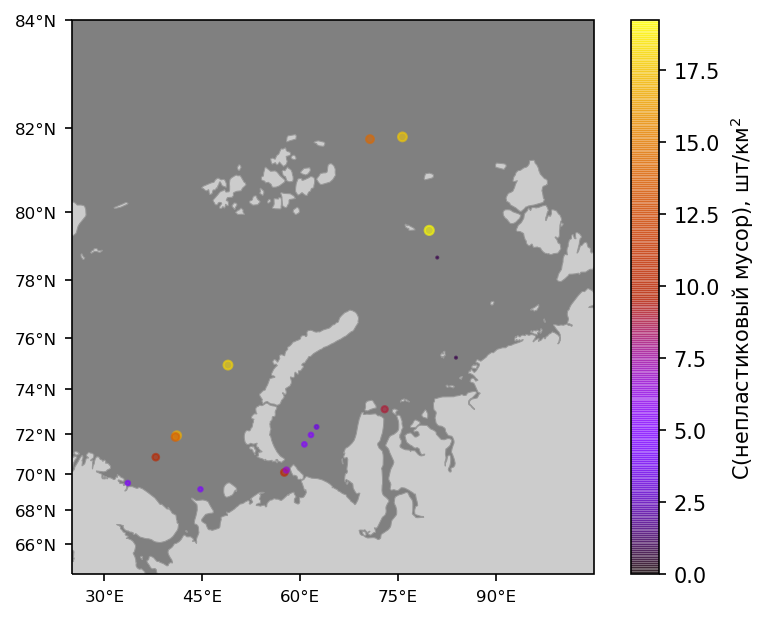

In [26]:
# Построение карты концентраций

fig = plt.figure(dpi=150)
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent(extent, crs=data_crs)
ax.add_feature(cfeature.LAND, edgecolor='0.6', linewidth = 0.5, zorder=1, facecolor='0.8')
ax.add_feature(cfeature.OCEAN, facecolor='0.5', zorder=0)
points = ax.scatter(conc_df.lon_mean, conc_df.lat_mean, c=conc_df.h_nonplastic, s=conc_df.h_nonplastic, transform=data_crs, 
                    zorder=3, cmap='gnuplot', alpha=0.6)

ax.set_xticks(np.arange(30, 105, 15), crs=data_crs)
ax.set_yticks(np.arange(66, 85, 2), crs=data_crs)
lon_formatter = LongitudeFormatter(number_format='.0f', dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.0f')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.tick_params(labelsize=8)

plt.colorbar(points, label=r'С(непластиковый мусор), шт/км$^{2}$')
plt.savefig('Conc_nonplast.png', dpi=300, bbox_inches='tight')

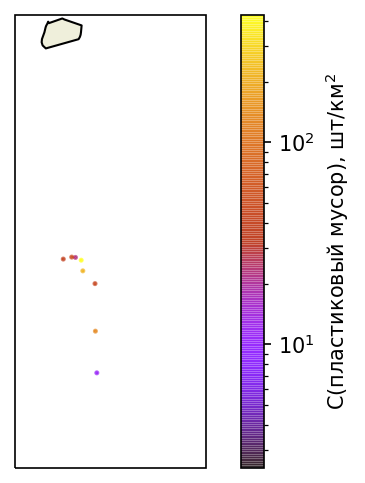

In [29]:
fig = plt.figure(dpi=150)
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([78, 85, 78, 81], crs=data_crs)
ax.add_feature(cfeature.LAND, edgecolor='black', zorder=1)
points = ax.scatter(conc_df.lon, conc_df.lat, c=conc_df.h_plastic, s=2, transform=data_crs, 
                    zorder=3, norm=colors_cm.LogNorm(), cmap='gnuplot', alpha=0.6)

# ax.set_xticks(np.arange(30, 105, 15), crs=data_crs)
# ax.set_yticks(np.arange(66, 85, 2), crs=data_crs)
# lon_formatter = LongitudeFormatter(number_format='.0f', dateline_direction_label=True)
# lat_formatter = LatitudeFormatter(number_format='.0f')
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.tick_params(labelsize=8)

plt.colorbar(points, label=r'С(пластиковый мусор), шт/км$^{2}$')
plt.savefig('Conc_plast.png', dpi=300, bbox_inches='tight')

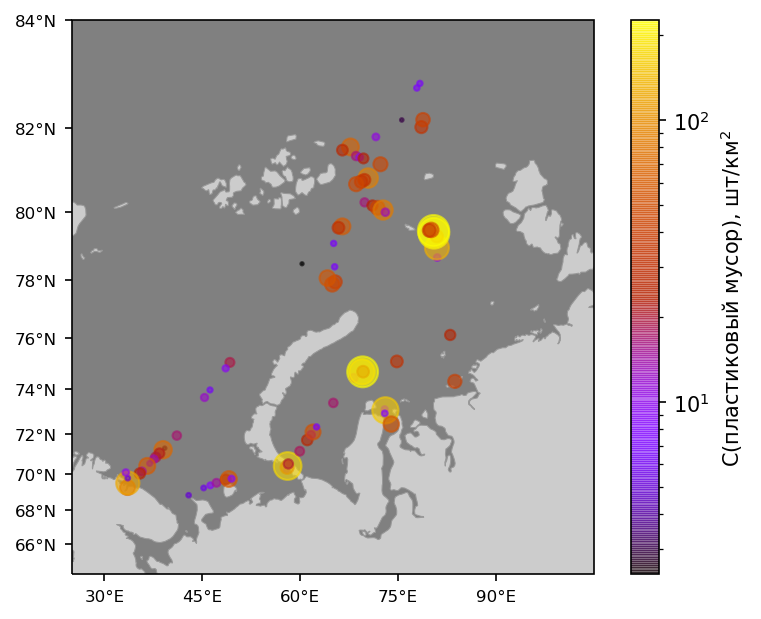

In [25]:
# Построение карты концентраций

fig = plt.figure(dpi=150)
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent(extent, crs=data_crs)
ax.add_feature(cfeature.LAND, edgecolor='0.6', linewidth = 0.5, zorder=1, facecolor='0.8')
ax.add_feature(cfeature.OCEAN, facecolor='0.5', zorder=0)
points = ax.scatter(conc_df.lon_mean, conc_df.lat_mean, c=conc_df.h_plastic, s=conc_df.h_plastic, transform=data_crs, 
                    zorder=3, norm=colors_cm.LogNorm(), cmap='gnuplot', alpha=0.6)

ax.set_xticks(np.arange(30, 105, 15), crs=data_crs)
ax.set_yticks(np.arange(66, 85, 2), crs=data_crs)
lon_formatter = LongitudeFormatter(number_format='.0f', dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.0f')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.tick_params(labelsize=8)


plt.colorbar(points, label=r'С(пластиковый мусор), шт/км$^{2}$')
plt.savefig('Conc_plast.png', dpi=300, bbox_inches='tight')

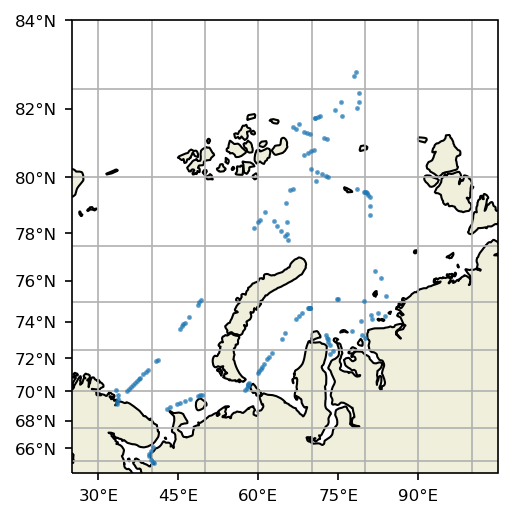

In [31]:
# Построение карты концентраций

fig = plt.figure(dpi=150)
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent(extent, crs=data_crs)
ax.add_feature(cfeature.LAND, edgecolor='black', zorder=1)
points = ax.scatter(conc_df.lon, conc_df.lat, s=2, transform=data_crs, 
                    zorder=3, norm=colors_cm.LogNorm(), cmap='gnuplot', alpha=0.6)

ax.set_xticks(np.arange(30, 105, 15), crs=data_crs)
ax.set_yticks(np.arange(66, 85, 2), crs=data_crs)
lon_formatter = LongitudeFormatter(number_format='.0f', dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.0f')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.tick_params(labelsize=8)
ax.gridlines()

plt.savefig('Conc_plast.png', dpi=300, bbox_inches='tight')

In [ ]:
countfile = fullfile[regions['Barents sea'][0]:regions['Barents sea'][1]].groupby('type').count().markers
human_lit_count = []
human_lit_name = []
for litter in origin['human_plastic']:
    if litter in countfile:
        human_lit_count.append(countfile[litter])
        human_lit_name.append(litter)

In [28]:
countfile = fullfile.groupby('type').count().markers
# pl_i = sum([countfile[item] for item in plast_types['Plastic items']])
# pl_i
human_lit_count = []
human_lit_name = []
for litter in plast_types:
    pl_i = 0
    for item in plast_types[litter]:
        if item in countfile:
            pl_i += countfile[item]
    human_lit_count.append(pl_i)
    human_lit_name.append(litter)

AttributeError: 'list' object has no attribute 'groupby'

In [11]:
counfile = fullfile[regions['Barents sea'][0]:regions['Barents sea'][1]].groupby('type').count().markers
for litter in origin['human_plastic']:
    print(litter)

Bag
Cover / packaging
Fishing net
Litter patch >20 items
Other plastic/polystyrene items
Plastic bottle
Plastic container
Plastic pieces 2.5cm - 50cm
Plastic pieces > 50cm
Polystyrene pieces 2.5 cm - 50cm
Polystyrene pieces > 50 cm
Polyurethane granules <5mm
Sheets
Synthetic rope
